In [41]:
import pandas as pd
na_values = ['missing','na','not-available','unspecified','unknown','-1','not-recorded','unestablished',"-9999",'nan']
df = pd.read_csv('../../data/train.csv',index_col=0,na_values=na_values)
df.columns = ["make",'class','engine_size','cylinders','transmission','fuel_type','fuel_consumption_city','fuel_consumption_hwy','fuel_consumption_comb','emission']
df.head()

,make,class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb,emission
Id,,,,,,,,,,
1,FOLD,PICKUP TRUCK - STANDARD,3.5,6.0,A6,X,8.64 liters per 100 km,6.14 L/100 km,37.59 mpg Imp.,306.0
2,CHEVO,PICKUP TRUCK - STANDARD,5.3,NaN,A6,E,27.27 liters per 100 km,30.76 liters per 100 km,28.84 L/100 km,283.0
3,BMV,SUBCOMPACT,4.4,NaN,M6,Z,0.17 L/10km,2.03 liters per 100 km,zero,329.0
4,KIO,SUV - SMALL,NaN,4.0,AS6,X,6.52 km per L,1.59 L/10km,NaN,270.0
5,BARUSU,MINICOMPACT,3.0,6.0,NaN,Z,20.15 L/100km,0.60 L/10km,1.38 L/10km,193.0


## missing Values

<Axes: >

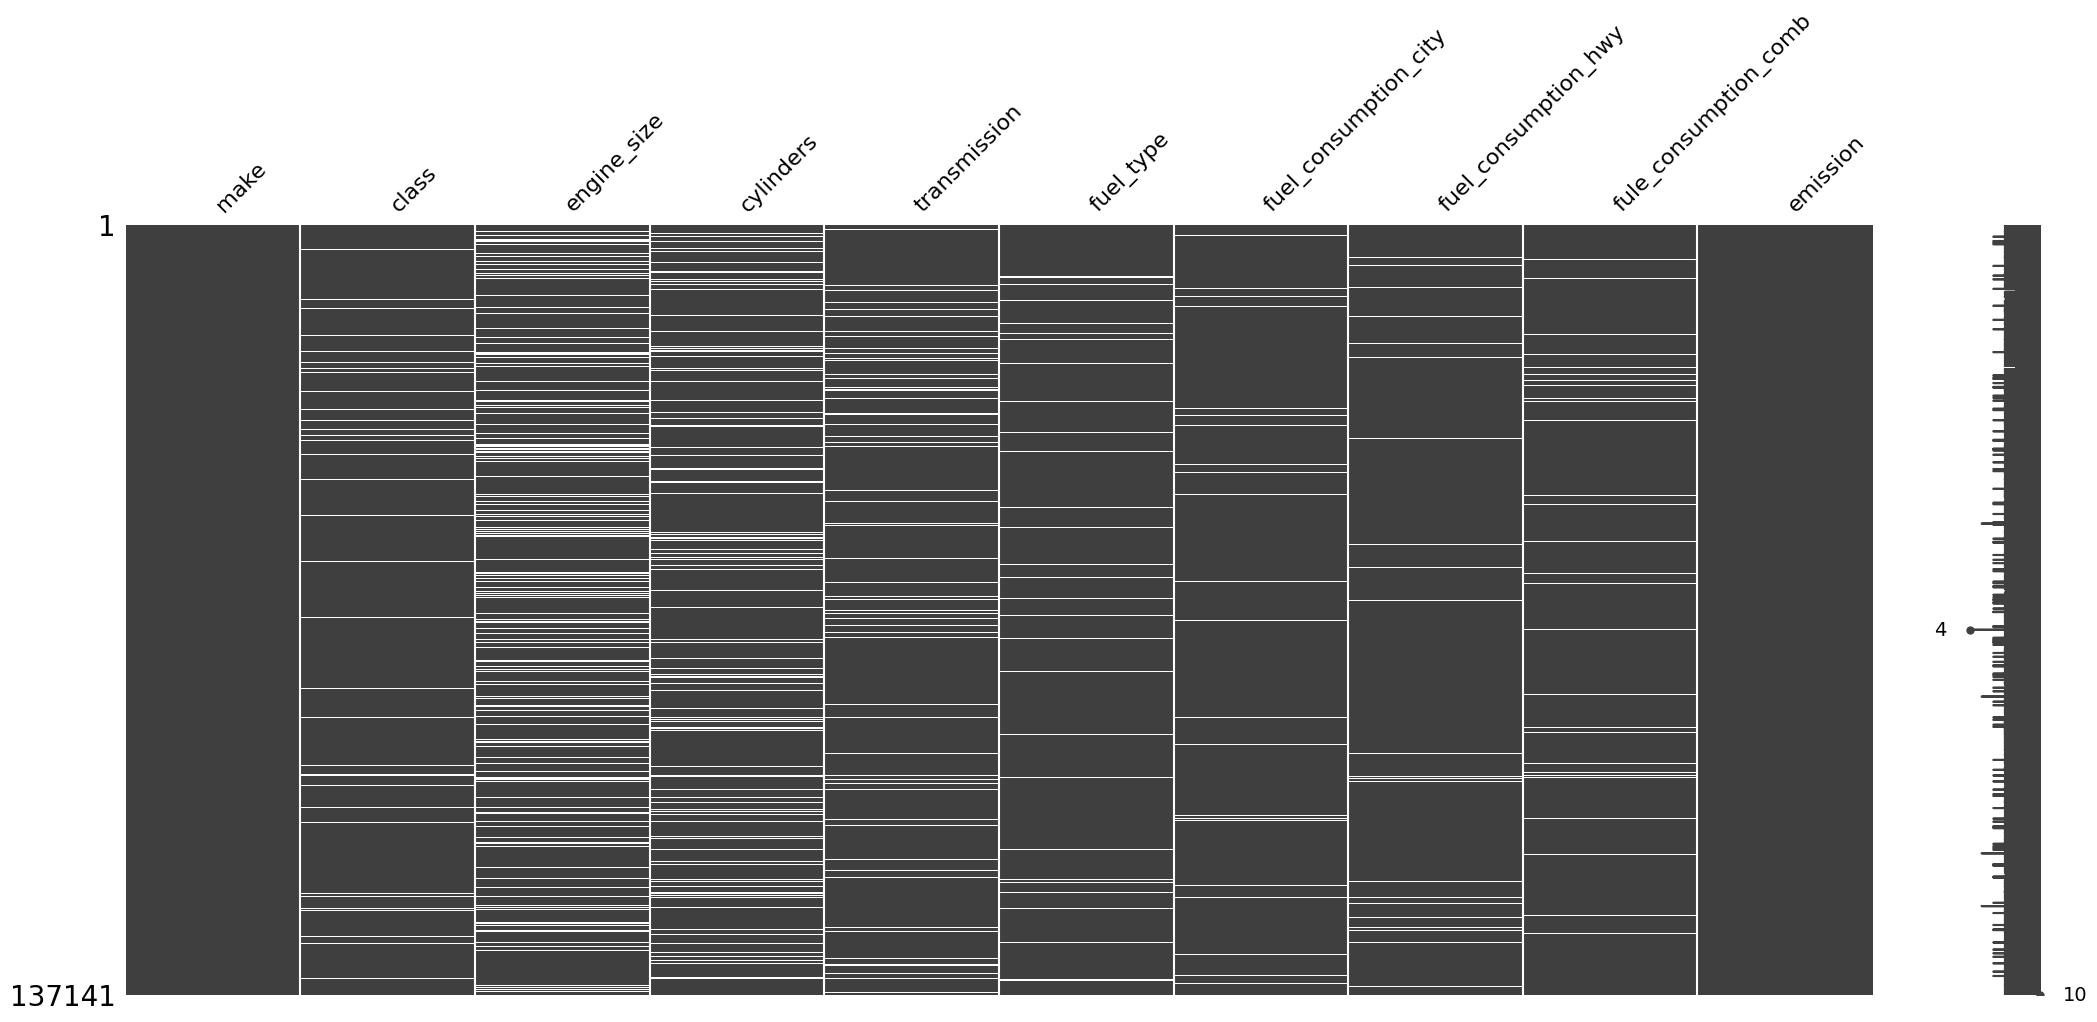

In [25]:
#plot missing values
import missingno as msno
msno.matrix(df)

In [52]:
import re

def split_data(data):
    # if the data is empty return None
    split_list = re.split('(\d+(?:\.\d+)?)', data, maxsplit=1)
    if len(split_list) < 2:
        return 0, split_list[0]
    else:
        return split_list[1], split_list[2]


def fuel_consumption(data,column,new_columns):
    tmp = data.copy()
    tmp[new_columns[0]] = tmp[column].apply(lambda x: split_data(str(x))[0])
    #make to float
    tmp[new_columns[0]] = tmp[new_columns[0]].astype(float)

    tmp[new_columns[1]] = tmp[column].apply(lambda x: split_data(str(x))[1])
    #remove white space
    tmp[new_columns[1]] = tmp[new_columns[1]].apply(lambda x: x.strip())
    return tmp

df = fuel_consumption(df,'fuel_consumption_city',['fuel_city','city_measure'])
df = fuel_consumption(df,'fuel_consumption_hwy',['fuel_hwy','hwy_measure'])
df = fuel_consumption(df,'fuel_consumption_comb',['fuel_comb','comb_measure'])

In [53]:
df.comb_measure.unique()

array(['mpg Imp.', 'L/100 km', 'zero', 'nan', 'L/10km', 'MPG (AS)',
       'km/L', 'L/100km', 'km per L', 'liters per 100 km', ''],
      dtype=object)

In [54]:
df.city_measure.unique()

array(['liters per 100 km', 'L/10km', 'km per L', 'L/100km', 'MPG (AS)',
       'mpg Imp.', 'nan', 'L/100 km', 'km/L', '', 'zero'], dtype=object)

In [59]:
def mpg_to_l100km(value):
    value = 235.215/value
    return value

def l10km_to_l100km(value):
    value = value*100
    return value

def kml_to_l100km(value):
    value = 100/value
    return value

def lkm_to_l100km(value):
    value = value/100
    return value

def convert_unit(value, anchor):
    if anchor in ['mpg Imp.', 'MPG (AS)']:
        value = mpg_to_l100km(value)
    elif anchor in ['L/10km']:
        value = l10km_to_l100km(value)
    elif anchor in ['km/L', 'km per L']:
        value = kml_to_l100km(value)
    elif anchor in ['liters per 100 km', 'L/100km', 'L/100 km', 'L/100km']:
        value = value
    else:
        value = 9999
    return value

df[['fuel_city', 'city_measure']].apply(lambda x: convert_unit(x['fuel_city'], x['city_measure']), axis=1, result_type='expand')


Id
1          8.640000
2         27.270000
3         17.000000
4         15.337423
5         20.150000
            ...    
137137    33.710000
137138     6.489293
137139     2.990000
137140    11.480000
137141     3.360000
Length: 137141, dtype: float64

In [60]:
df[['fuel_city','city_measure']]

,fuel_city,city_measure
Id,,
1,8.64,liters per 100 km
2,27.27,liters per 100 km
3,0.17,L/10km
4,6.52,km per L
5,20.15,L/100km
...,...,...
137137,33.71,L/100 km
137138,15.41,km per L
137139,2.99,liters per 100 km
